In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import re
import string
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
nltk.download('all')
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import f1_score

In [4]:
#Importing Data
train = pd.read_csv('/content/drive/My Drive/ML-Project/train.csv')
val = pd.read_csv('/content/drive/My Drive/ML-Project/validation.csv')
print(train.shape, val.shape)
print(train.columns)
train.head()

(6420, 3) (2140, 3)
Index(['id', 'tweet', 'label'], dtype='object')


,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


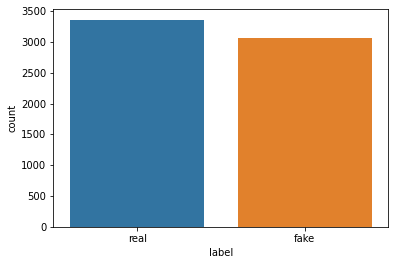

In [ ]:
#Visualising the number of instances per class
sns.countplot(x = 'label', data = train)

In [ ]:
#Encoding Label for "fake" and "real"
encoder = preprocessing.LabelEncoder()
train['label'] = encoder.fit_transform(train['label'])
val['label'] = encoder.transform(val['label'])
train.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,1
1,2,States reported 1121 deaths a small rise from ...,1
2,3,Politically Correct Woman (Almost) Uses Pandem...,0
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,1
4,5,Populous states can generate large case counts...,1


In [ ]:
#Removing Links from tweets
def removeLinks(text):
  text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE)
  return text

train['tweet'] = train['tweet'].apply(lambda x: removeLinks(x))
val['tweet'] = val['tweet'].apply(lambda x: removeLinks(x))

(-0.5, 399.5, 199.5, -0.5)

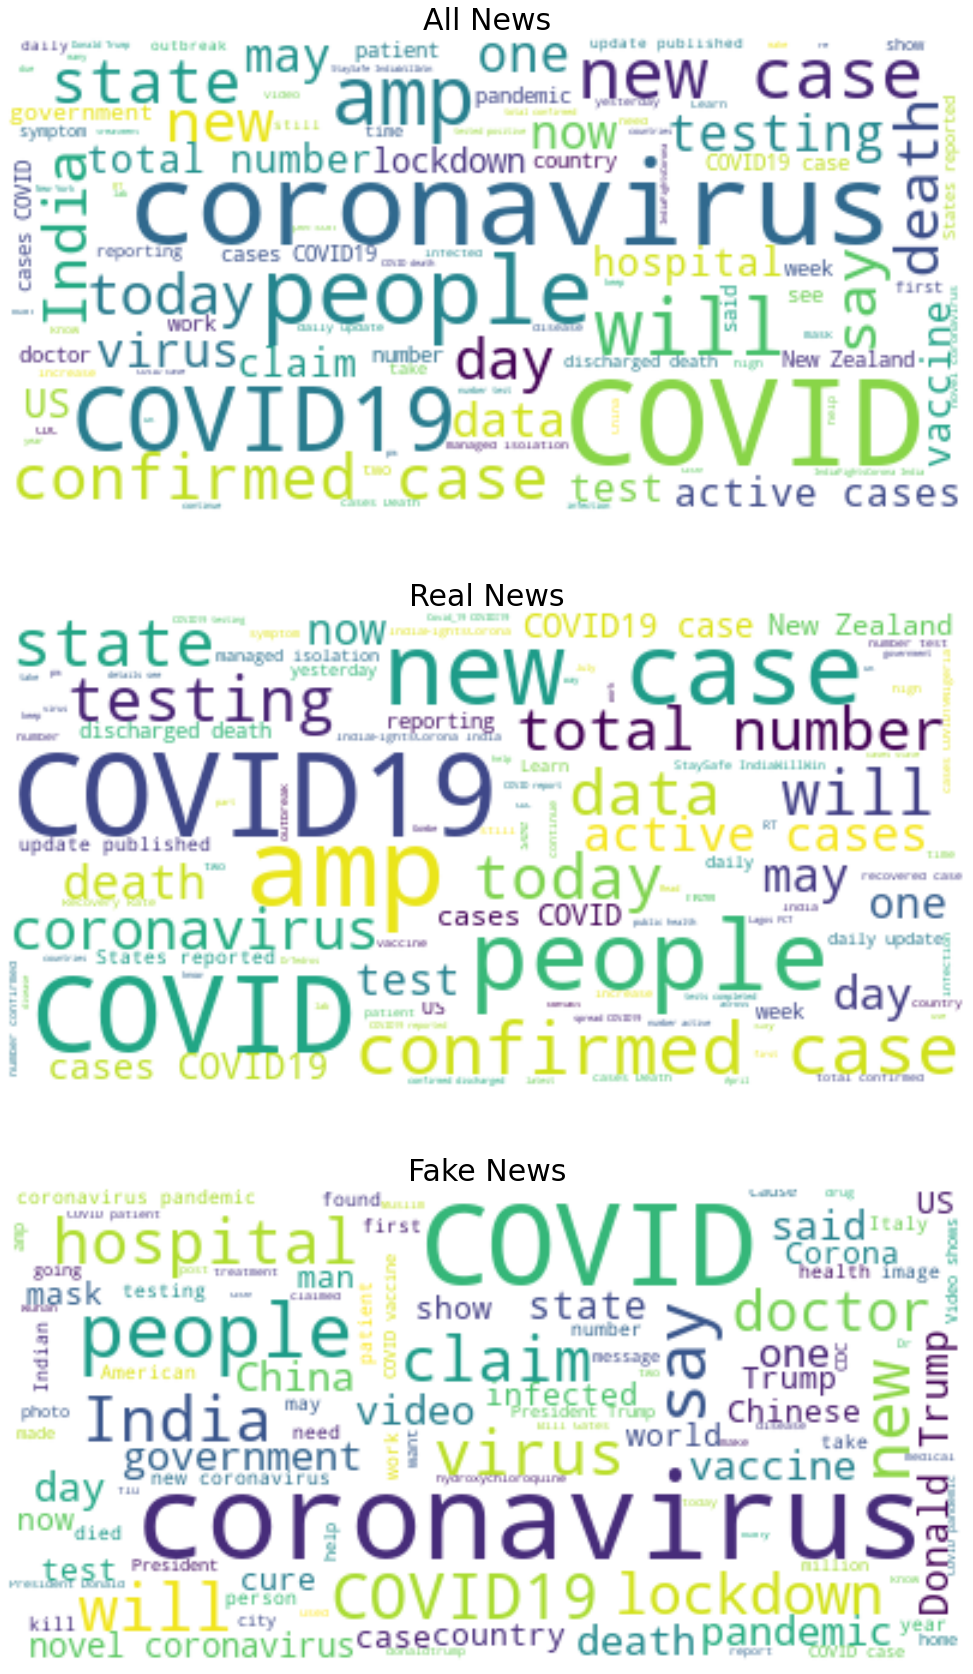

In [ ]:
#Generating Word Clouds
all_news = " ".join(review for review in train.tweet)
real_news = " ".join(review for review in train[train['label']==1].tweet)
fake_news = " ".join(review for review in train[train['label']==0].tweet)

fig, ax = plt.subplots(3, 1, figsize  = (30,30))
all_wc = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(all_news)
real_wc = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(real_news)
fake_wc = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(fake_news)

#Creating plots for WordClouds
ax[0].imshow(all_wc, interpolation='bilinear')
ax[0].set_title('All News', fontsize=30)
ax[0].axis('off')
ax[1].imshow(real_wc, interpolation='bilinear')
ax[1].set_title('Real News',fontsize=30)
ax[1].axis('off')
ax[2].imshow(fake_wc, interpolation='bilinear')
ax[2].set_title('Fake News',fontsize=30)
ax[2].axis('off')

Common Words in both categories are:


1. coronavirus
2. COVID
3. COVID19
4. new
5. people
6. death
7. state
8. one

These words can hence be removed with stopper words and won't impact the final result

